## Import Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Walmart.xlsx')
data.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [4]:
data.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493233,3.828910,33.849032
std,524.876877,2.260947,174.109081
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.852000
50%,60.840000,3.000000,11.166400
75%,215.809000,5.000000,33.000400
max,13999.960000,14.000000,6719.980800


In [5]:
data.describe(include='object')

,Order ID,Customer Name,Country,City,State,Category,Product Name
count,3203,3203,3203,3203,3203,3203,3203
unique,1611,686,1,169,11,17,1494
top,CA-2013-165330,William Brown,United States,Los Angeles,California,Binders,Staples
freq,11,24,3203,747,2001,471,60


# Check for missing values

In [6]:
data.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

The given Data is clean and can be used for futher analysis(EDA).

# Check the types

In [7]:
data.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Customer Name            object
Country                  object
City                     object
State                    object
Category                 object
Product Name             object
Sales                   float64
Quantity                  int64
Profit                  float64
dtype: object

converting the data types of the columns to the required data types.

In [12]:
data['Customer Name'] = data['Customer Name'].astype('category')
data['Country'] = data['Country'].astype('category')
data['City'] = data['City'].astype('category')
data['State'] = data['State'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Product Name'] = data['Product Name'].astype('category')

Performming correlation analysis and visualize relationships using scatter plots or correlation matrices.

C:\Users\Aumba\AppData\Local\Temp\ipykernel_27904\3352654686.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


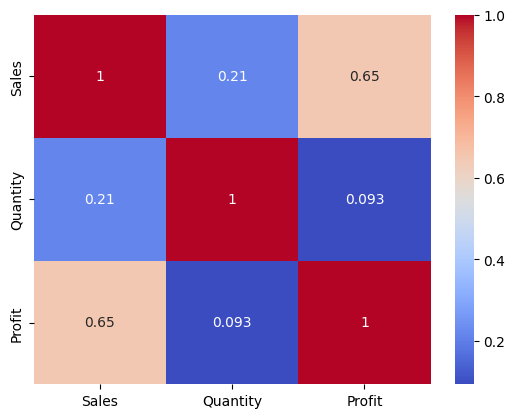

In [13]:
# Get correlation matrix
corr = data.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Sales vs Profit')

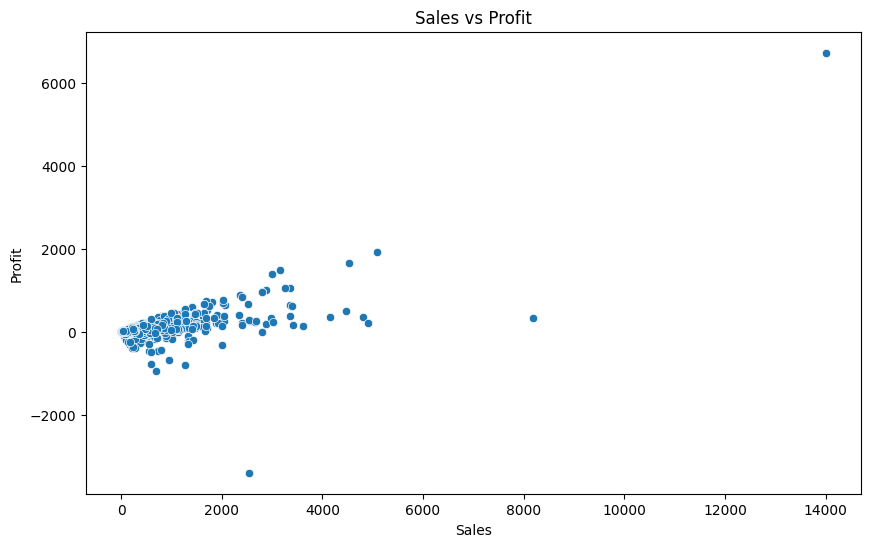

In [14]:
# Scatter plot for Sales vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.title('Sales vs Profit')

<Axes: xlabel='Category', ylabel='Sales'>

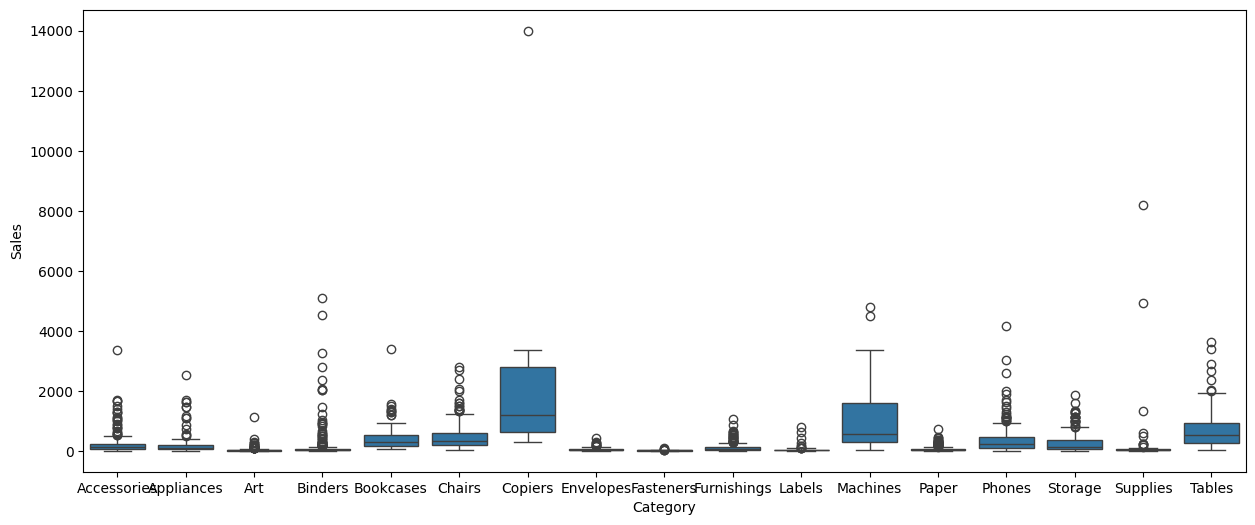

In [ ]:
# Box plot for each Category
plt.figure(figsize=(15,6))
sns.boxplot(x='Category', y='Sales', data=data)

Series of various plots for understanding the data.

Text(0.5, 1.0, 'Distribution of Sales')

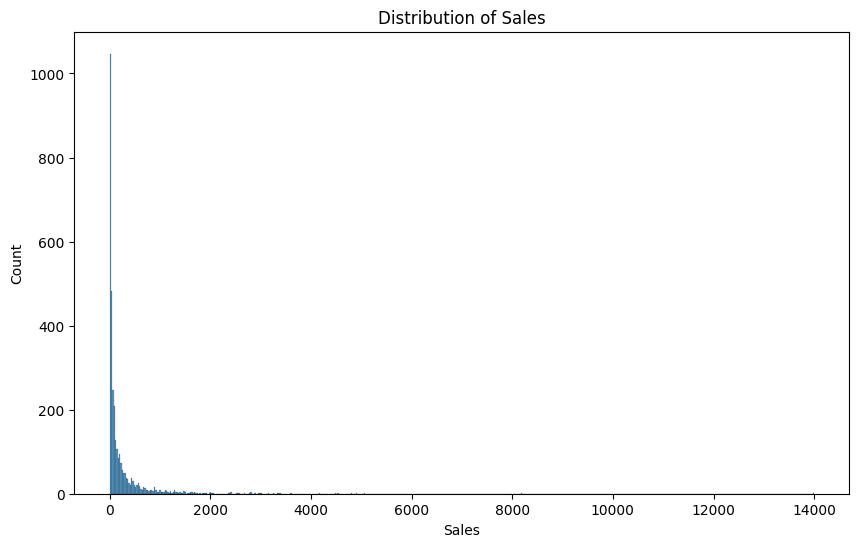

In [17]:
# Histogram for Sales
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'])
plt.title('Distribution of Sales')


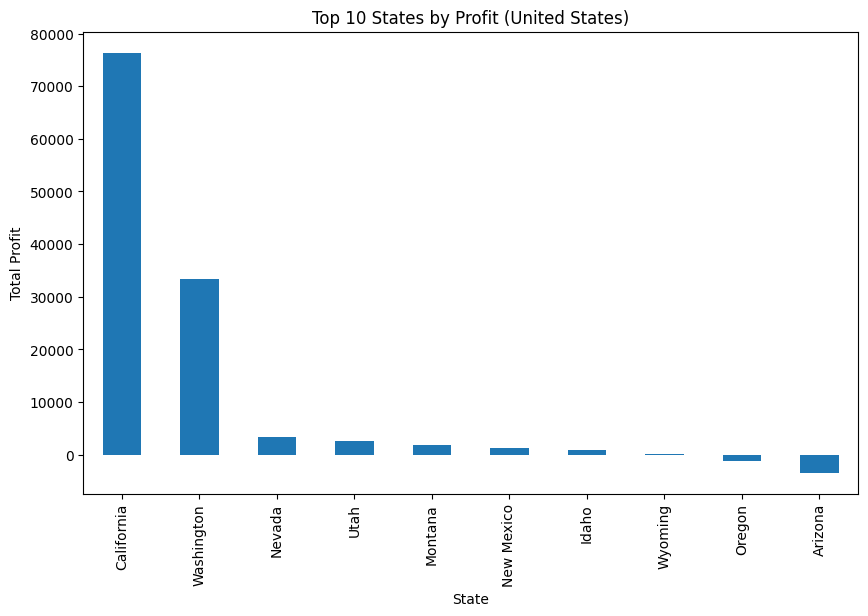

In [29]:
# Grouping data by Country and State
country_state_sales = data.groupby(['Country', 'State'])['Sales'].sum().reset_index()
country_state_profit = data.groupby(['Country', 'State'])['Profit'].sum().reset_index()

# Visualizing top states by Profit
top_states_profit = country_state_profit[country_state_profit['Country'] == 'United States'].groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
top_states_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 States by Profit (United States)')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()

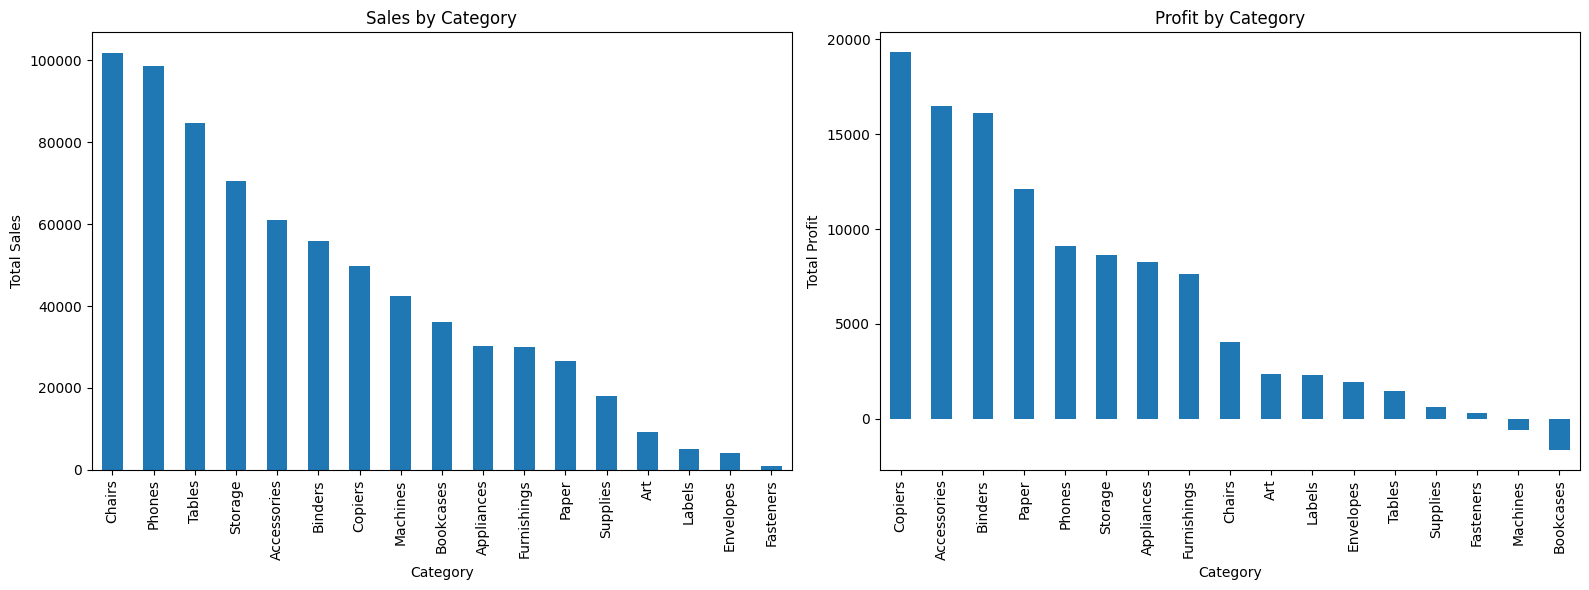

In [30]:
# Grouping data by Category
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Visualizing Sales and Profit by Category
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

category_sales.plot(kind='bar', ax=ax[0])
ax[0].set_title('Sales by Category')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Total Sales')

category_profit.plot(kind='bar', ax=ax[1])
ax[1].set_title('Profit by Category')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

C:\Users\Aumba\AppData\Local\Temp\ipykernel_27904\2969102719.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


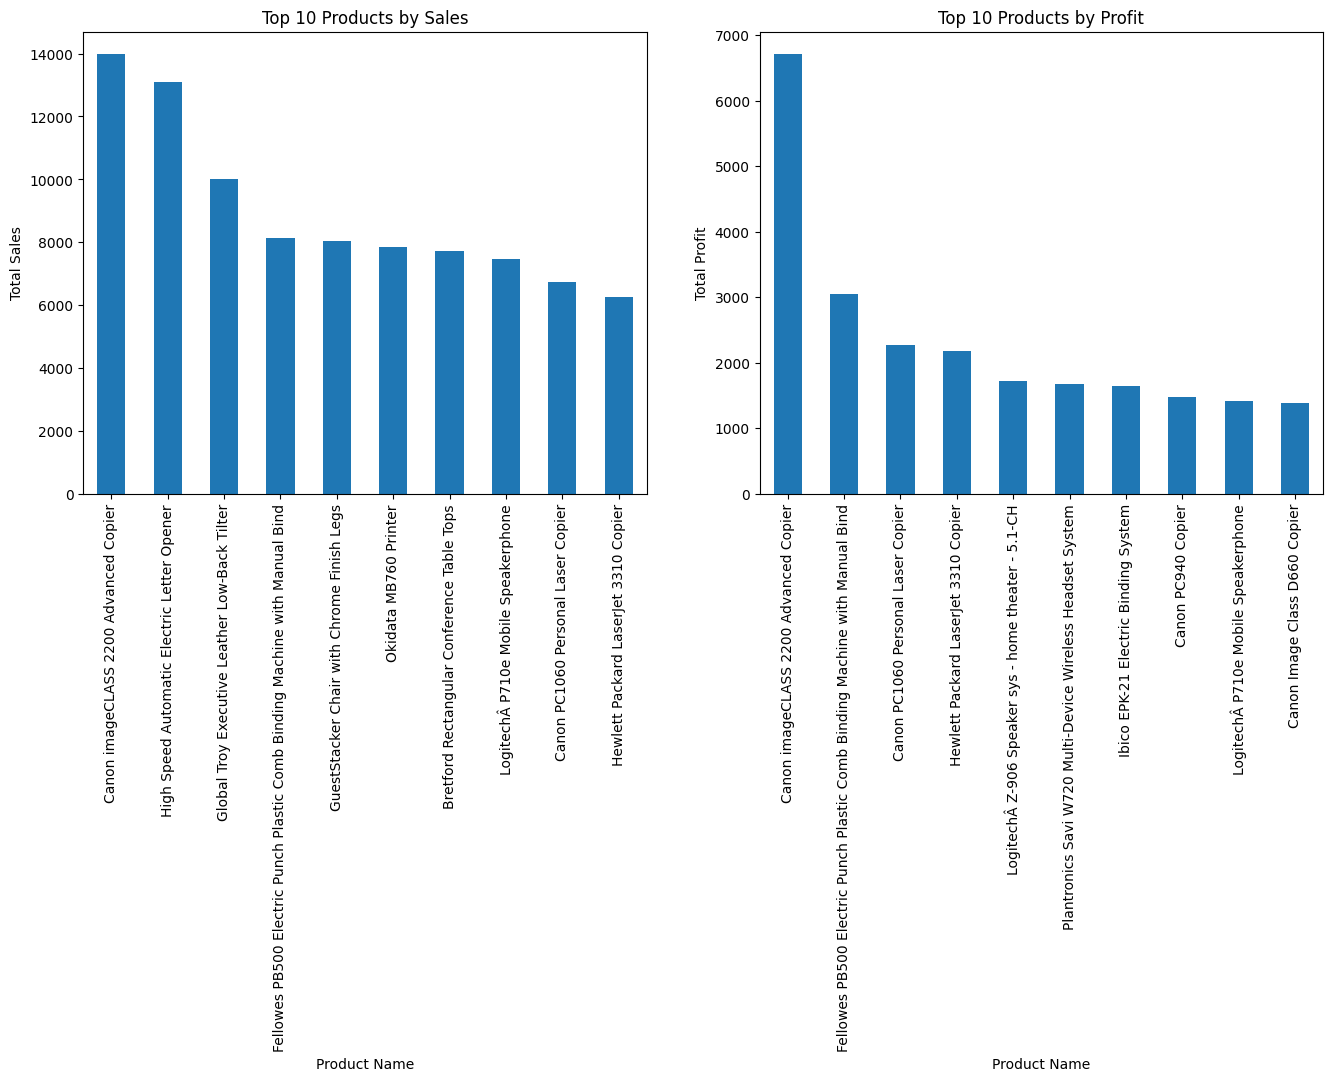

In [31]:
# Grouping data by Product Name
product_sales = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
product_profit = data.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Visualizing top 10 products by Sales and Profit
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

product_sales.plot(kind='bar', ax=ax[0])
ax[0].set_title('Top 10 Products by Sales')
ax[0].set_xlabel('Product Name')
ax[0].set_ylabel('Total Sales')

product_profit.plot(kind='bar', ax=ax[1])
ax[1].set_title('Top 10 Products by Profit')
ax[1].set_xlabel('Product Name')
ax[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()